In [8]:
import numpy as np
from StringIO import StringIO

In [22]:
V_sun = 4.83               #V-band
r_sun = 4.676              #r-band from table I of Into & Portinari 2013
G = 6.67408e-11            # gravitational constant
Msun = 1.99e30             #mass of sun
a2p = ((np.pi/180.0)*(1.0/3600.0))    #arcsecond to parsec conversion
p2m = 3.086e16             #parsec to meter conversion
c = 299792                 #speed of light in km/s
H0 = 70.0                    #hubble constant

def Vband(g,r):
    '''V-band apparent magnitude'''
    V = g - 0.565*(g-r) - 0.016
    return(V)

def V_Luminosity(V):
    '''Luminosity per solar unit'''
    L = 10**(-(V_sun-V)/2.5)
    return(L)

def AbsV(V, d):
    '''Absolute Magnitude from Apparent Magnitude'''
    M = V + 5.0 - 5.0*(log10(d))
    return(M)

def R_e(devRad,fracDev,expRad):
    '''The Effective radius'''
    Re = (devRad*fracDev) + expRad*( 1.0 - fracDev)
    return(Re)

def nLMXB(M,gz,r_e):
    '''Number of LMXBs for L_X > 3.2e38 erg/s'''
    9.0e-2*((M/1e6)**1.237)*(10.0**(0.9*(gz)))*(r_e)**-2.22



In [7]:
PandyaAppendix3 = np.genfromtxt('C:\Users\Devin\Documents\GitHub\In-Rainbows\Untitled Folder\Data\Pandya X-Ray Detected Optical Properties.csv', \
                                names=True,delimiter=',',dtype=None,unpack=True,skip_header=0)

P_optical_Name = PandyaAppendix3['Name']            #Adopted UCD literature name 
P_optical_System = PandyaAppendix3['System']        #UCD host system
P_optical_RA = PandyaAppendix3['RA']                #Right Ascension in decimal degrees (J2000) [deg]
P_optical_Dec = PandyaAppendix3['Dec']              #Declination in decimal degrees (J2000) [deg]
P_optical_Distance = PandyaAppendix3['Distance']    #Adopted distance [Mpc]
P_optical_M_V = PandyaAppendix3['M_V']              #Absolute V band magnitude [mag]
P_optical_logM = PandyaAppendix3['logM']            #Log dynamical mass [solMass]
P_optical_e_logM = PandyaAppendix3['e_logM']        #Uncertainty in logM [solMass]
P_optical_rhl = PandyaAppendix3['rhl']              #Optical half-light radius [pc]
P_optical_e_rhl = PandyaAppendix3['e_rhl']          #Uncertainty in optical half-light radius [pc]
P_optical_HRV = PandyaAppendix3['HRV']              #Heliocentric radial velocity [km/s]
P_optical_sigma = PandyaAppendix3['sigma']          #Global stellar velocity dispersion [km/s]
P_optical_e_sigma = PandyaAppendix3['e_sigma']      #Uncertainty in global stellar velocity dispersion [km/s]
P_optical_ML = PandyaAppendix3['ML']                #Dynamical mass-to-light ratio [solMass/solLum]
P_optical_e_ML = PandyaAppendix3['e_ML']            #Uncertainty in dynamical mass-to-light ratio [solMass/solLum]
P_optical_nLMXB = PandyaAppendix3['nLMXB']          #Expected number of LMXBs

In [12]:
PandyaAppendix4 = np.genfromtxt('C:\Users\Devin\Documents\GitHub\In-Rainbows\Untitled Folder\Data\Pandya X-Ray Detected X-ray Properties.csv', \
                                names=True,delimiter=',',dtype=None,unpack=True,skip_header=0)

P_Xray_UCD = PandyaAppendix4['UCD']                 #Adopted UCD literature name
P_Xray_f_UCD = PandyaAppendix4['f_UCD']             #Flag on UCD (1)
P_Xray_Sys = PandyaAppendix4['Sys']                 #UCD host system
P_Xray_Exp = PandyaAppendix4['Exp']                 #Total exposure time
P_Xray_theta = PandyaAppendix4['theta']             #Average off-axis angle (2) 
P_Xray_sx = PandyaAppendix4['sx']                   #Separation between optical X-ray positions (3)
P_Xray_R = PandyaAppendix4['R']                     #Average radius of circular aperture (4) 
P_Xray_NCF = PandyaAppendix4['NCF']                 #Net full band (0.5-7 keV) counts  
P_Xray_e_NCF = PandyaAppendix4['e_NCF']             #The 1{sigma} uncertainty in NCF (5)
P_Xray_NCH = PandyaAppendix4['NCH']                 #Net hard band (2-7 keV) counts 
P_Xray_e_NCH = PandyaAppendix4['e_NCH']             #The 1{sigma} uncertainty in NCH (5)
P_Xray_NCS = PandyaAppendix4['NCS']                 #Net soft band (0.5-2 keV) counts  
P_Xray_e_NCS = PandyaAppendix4['e_NCS']             #The 1{sigma} uncertainty in NCS (5)
P_Xray_logFF = PandyaAppendix4['logFF']             #Log Full band (0.5-7 keV) flux; erg/s/cm^2^   
P_Xray_E_logFF = PandyaAppendix4['E_logFF']         #Upper 90% confidence interval in FF 
P_Xray_e_logFF = PandyaAppendix4['e_logFF']         #Lower 90% confidence interval in FF 
P_Xray_logFH = PandyaAppendix4['logFH']             #Log Hard band (2-7 keV) flux; erg/s/cm^2^  
P_Xray_E_logFH = PandyaAppendix4['E_logFH']         #Upper 90% confidence interval in FH   
P_Xray_e_logFH = PandyaAppendix4['e_logFH']         #Lower 90% confidence interval in FH  
P_Xray_logFS = PandyaAppendix4['logFS']             #Log Soft band (0.5-2 keV) flux; erg/s/cm^2^ 
P_Xray_E_logFS = PandyaAppendix4['E_logFS']         #Upper 90% confidence interval in FS   
P_Xray_e_logFS = PandyaAppendix4['e_logFS']         #Lower 90% confidence interval in FS
P_Xray_logLF = PandyaAppendix4['logLF']             #Log Full band (0.5-7 keV) luminosity; erg/s
P_Xray_E_logLF = PandyaAppendix4['E_logLF']         #Upper 90% confidence interval in LF   
P_Xray_e_logLF = PandyaAppendix4['e_logLF']         #Lower 90% confidence interval in LF
P_Xray_logLH = PandyaAppendix4['logLH']             #Log Hard band (2-7 keV) luminosity; erg/s
P_Xray_E_logLH = PandyaAppendix4['E_logLH']         #Upper 90% confidence interval in LH
P_Xray_e_logLH = PandyaAppendix4['e_logLH']         #Lower 90% confidence interval in LH
P_Xray_logLS = PandyaAppendix4['logLS']             #Log Soft band (0.5-2 keV) luminosity; erg/s
P_Xray_E_logLS = PandyaAppendix4['E_logLS']         #Upper 90% confidence interval in LS
P_Xray_e_logLS = PandyaAppendix4['e_logLS']         #Lower 90% confidence interval in LS
P_Xray_HR = PandyaAppendix4['HR']                   #Classical hardness ratio (6)
P_Xray_gamma = PandyaAppendix4['gamma']             #Best-fit power law photon index (7)
P_Xray_E_gamma = PandyaAppendix4['E_gamma']         #Upper 90% confidence interval in gamma
P_Xray_e_gamma = PandyaAppendix4['e_gamma']         #Lower 90% confidence interval in gamma

In [14]:
Seth_data = np.genfromtxt('C:\Users\Devin\Documents\GitHub\In-Rainbows\Untitled Folder\Data\Seth X-ray_only.csv', \
                                names=True,delimiter=',',dtype=None,unpack=True,skip_header=0)

S_Xray_Name = Seth_data['Name']
S_Xray_TType = Seth_data['TType']
S_Xray_T = Seth_data['T']
S_Xray_Dist = Seth_data['Dist']
S_Xray_BMAG = Seth_data['BMAG']
S_Xray_logM = Seth_data['logMG']
S_Xray_r_logMG = Seth_data['r_logMG']
S_Xray_reff = 1. / Seth_data['Reff']
S_Xray_logMNC = Seth_data['logMNC']
S_Xray_Sref = Seth_data['Sref']
S_Xray_Simbad = Seth_data['Simbad']
S_Xray_NED = Seth_data['NED']
S_Xray_ra = Seth_data['_RA']
S_Xray_dec = Seth_data['_DE']
S_Xray_L = np.log10(Seth_data['Xray'])

In [5]:
%cd C:\Users\Devin\Google Drive\Astro Research\Data\SLUGGS Globular Clusters\With Photo
    
SLUGGS_GC = np.genfromtxt('SLUGGS_GC_photo.csv', names=True,delimiter=',',dtype=None,unpack=True,skip_header=0)
Name_SLUGGS_GC = SLUGGS_GC['Name']
RA_SLUGGS_GC = SLUGGS_GC['RA']
Dec_SLUGGS_GC = SLUGGS_GC['Dec']
Vrad_SLUGGS_GC = SLUGGS_GC['V']
Vrad_e_SLUGGS_GC = SLUGGS_GC['V_err']
g_SLUGGS_GC = SLUGGS_GC['g']
g_err_SLUGGS_GC = SLUGGS_GC['g_err']
r_SLUGGS_GC = SLUGGS_GC['r']
r_err_SLUGGS_GC = SLUGGS_GC['r_err']
i_SLUGGS_GC = SLUGGS_GC['i']
i_err_SLUGGS_GC = SLUGGS_GC['i_err']
d_SLUGGS_GC = SLUGGS_GC['distance'] / 1e6

%cd C:\Users\Devin\Google Drive\Astro Research\Data

C:\Users\Devin\Google Drive\Astro Research\Data\SLUGGS Globular Clusters\With Photo
C:\Users\Devin\Google Drive\Astro Research\Data


In [24]:
%cd C:\Users\Devin\Google Drive\School\ASTR 155\Data Tables
norrisdata = np.genfromtxt('Data.csv', unpack = True, names = True, delimiter = ',')

names = norrisdata['Name'] #
typ = norrisdata['type']   #
ra = norrisdata['RA']      #Degrees
dec = norrisdata['Dec']    #Degrees
Mv = norrisdata['Mv']      #Mag
Mass = norrisdata['Mstar'] #Msun
Re = norrisdata['Re']      #pc
sig = norrisdata['Sig']    #km/s

## use isfinite() to index out the nan values

names = names[np.isfinite(names)]
typ = typ[np.isfinite(typ)]
ra = ra[np.isfinite(ra)]
dec = dec[np.isfinite(dec)]
Mv = Mv[np.isfinite(Mv)]
Mass_norrisdata = Mass[np.isfinite(Mass)]
Re = Re[np.isfinite(Re)]
sig = sig[np.isfinite(sig)]

EsS0s = np.where(typ == 1)[0]
dEsdS0s = np.where(typ == 2)[0]
dSphs = np.where(typ == 3)[0]
NSC = np.where(typ == 4)[0]
GC = np.where(typ == 5)[0]
New = np.where(typ == 6)[0]
YMCs = np.where(typ == 7)[0]

#Indexed masses
Mass1 = Mass_norrisdata[EsS0s]
Mass2 = Mass_norrisdata[dEsdS0s]
Norris_Mass3 = Mass_norrisdata[dSphs]
Mass4 = Mass_norrisdata[NSC]
Norris_Mass5 = Mass_norrisdata[GC]
Norris_Mass6 = Mass_norrisdata[New]
Mass7 = Mass_norrisdata[YMCs]

#Indexed Sigmas
sig1 = sig[EsS0s]
sig2 = sig[dEsdS0s]
sig3 = sig[dSphs]
sig4 = sig[NSC]
Norris_sig5 = sig[GC]
Norris_sig6 = sig[New]
sig7 = sig[YMCs]

#Indexed Re
Re1 = Re[EsS0s]
Re2 = Re[dEsdS0s]
Re3 = Re[dSphs]
Re4 = Re[NSC]
Norris_Re5 = Re[GC]
Norris_Re6 = Re[New]
Re7 = Re[YMCs]

#Indexed V magnitude
V1 = Mv[EsS0s]
V2 = Mv[dEsdS0s]
V3 = Mv[dSphs]
V4 = Mv[NSC]
Norris_V5 = Mv[GC]
Norris_V6 = Mv[New]
V7 = Mv[YMCs]

LV1 = V_Luminosity(V1)
LV2 = V_Luminosity(V2)
LV3 = V_Luminosity(V3)
LV4 = V_Luminosity(V4)
Norris_LV5 = V_Luminosity(Norris_V5)
Norris_LV6 = V_Luminosity(Norris_V6)
LV7 = V_Luminosity(V7)

print np.where(Mass_norrisdata == 1.37e6)

%cd C:\Users\Devin\Google Drive\Astro Research\Data

C:\Users\Devin\Google Drive\School\ASTR 155\Data Tables
(array([810], dtype=int64),)
C:\Users\Devin\Google Drive\Astro Research\Data


In [8]:
#Calculating apparent V magnitude of SLUGGS Globular Clusters.
V_SLUGGS_GC = Vband(g_SLUGGS_GC,r_SLUGGS_GC)
#Calculating absolute V magnitude of SLUGGS Globular Clusters.
Vabs_SLUGGS_GC = AbsV(V_SLUGGS_GC,d_SLUGGS_GC)
#Calculating luminosity of SLUGGS Globular Clusters.
L_SLUGGS_GC = V_Luminosity(V_SLUGGS_GC)
Mass_SLUGGS_GC = 2.*log10(L_SLUGGS_GC)
print V_SLUGGS_GC
print Vabs_SLUGGS_GC
print L_SLUGGS_GC
print Mass_SLUGGS_GC

[ 23.57204   22.83348   23.229575 ...,  66.10925   66.18059   66.977945]
[ 51.67868807  50.94012807  51.33622307 ...,  95.48314532  95.55448532
  96.35184032]
[  3.13917842e+07   1.58998124e+07   2.28997109e+07 ...,   3.24862813e+24
   3.46925322e+24   7.23066099e+24]
[ 14.993632  14.402784  14.71966  ...,  49.0234    49.080472  49.718356]


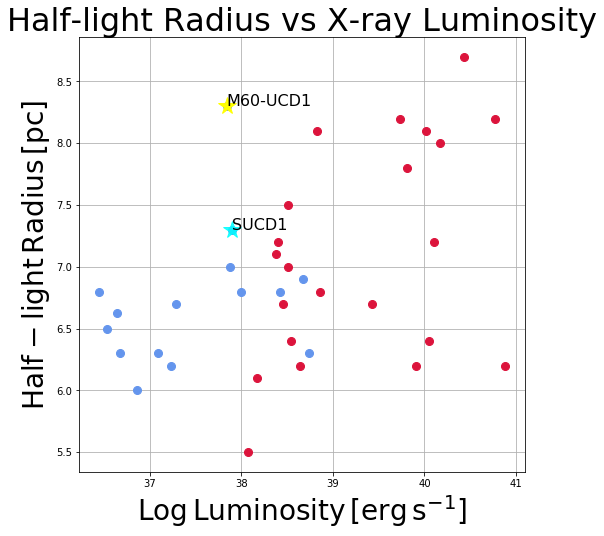

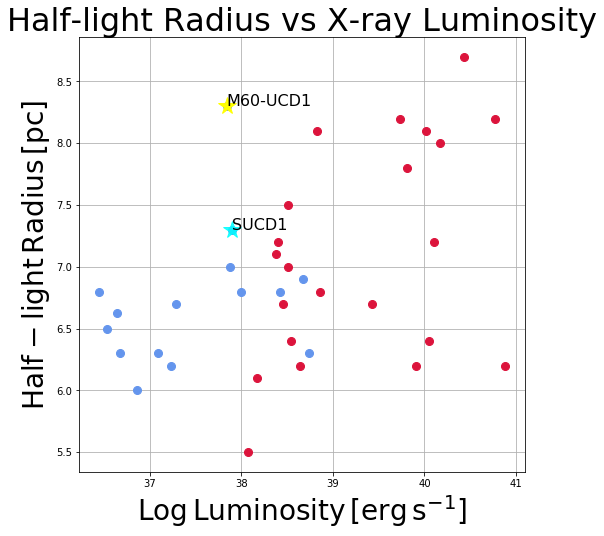

In [26]:
from pylab import *
mainfig = figure(figsize = [8,8])
title('Half-light Radius vs X-ray Luminosity',fontsize = 32)
xlabel('$\mathrm{Log \, Luminosity \, [erg \, s^{-1}] }$',fontsize = 28) #Observed
ylabel('$\mathrm{Half-light \, Radius \, [pc]}$',fontsize = 28) #
grid('on')

plot(P_Xray_logLF,P_optical_logM,'o',ms=8,color='cornflowerblue',label='Pandya UCDs')
plot(S_Xray_L,S_Xray_logMNC, 'o',ms=8,color='crimson',label='Seth NSCs')

plot(P_Xray_logLF[19],P_optical_logM[19],color='yellow', marker='*', linewidth=0, ms=18, label = 'Confirmed BH')
plot(P_Xray_logLF[18],P_optical_logM[18],color='cyan', marker='*', linewidth=0, ms=18, alpha = .85, label = 'Possibly BH')

text(P_Xray_logLF[19],P_optical_logM[19],'M60-UCD1', color='k', fontsize=16)
text(P_Xray_logLF[18],P_optical_logM[18],'SUCD1', color='k', fontsize=16)
plt.show()

#savefig('radvslum may15.png',bbox_inches='tight')

In [10]:
print log(Mass_norrisdata[775])
print ra[810]
print dec[775]

18.1329986715
201.469583
11.667694


-c:7: RuntimeWarning: invalid value encountered in power
C:\Users\Devin\AppData\Local\Enthought\Canopy\User\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


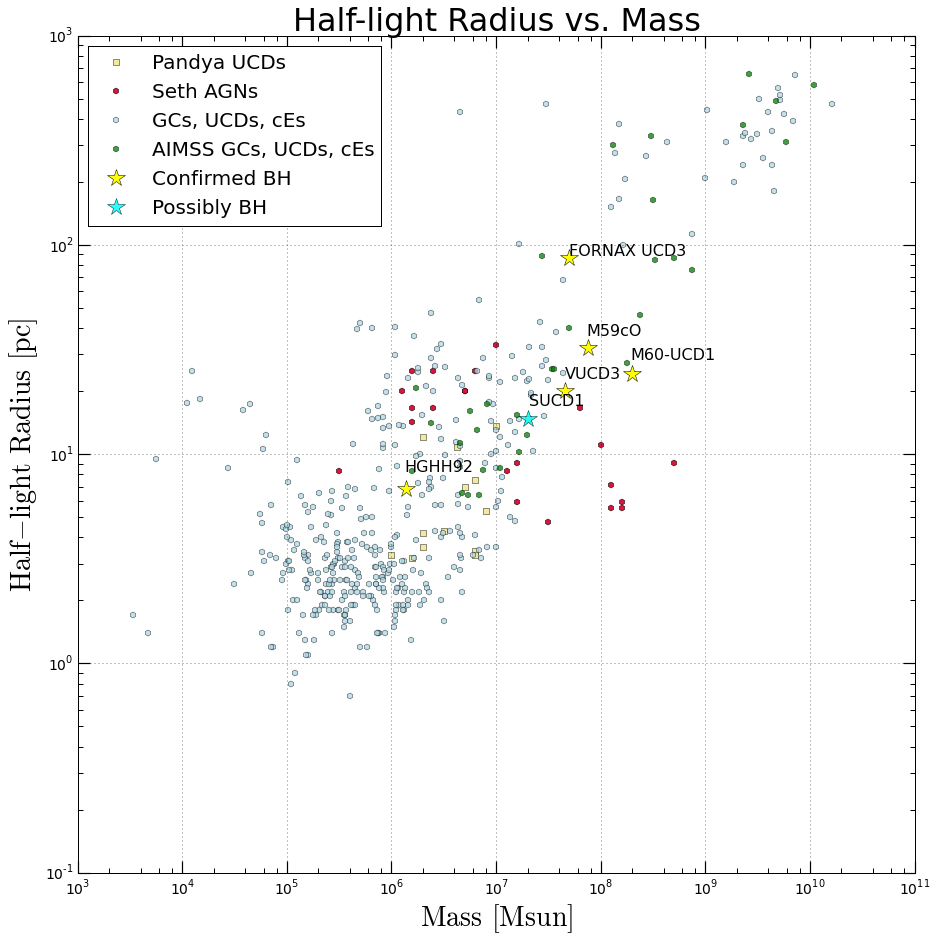

In [11]:
massfig = figure(figsize = [15,15])
title('Half-light Radius vs. Mass',fontsize = 32)
xlabel('$\mathrm{Mass \, [Msun]}$',fontsize = 28) #Observed
ylabel('$\mathrm{Half-light \, Radius \, [pc]}$',fontsize = 28) #
grid('on')

loglog(10**P_optical_logM, P_optical_rhl, color='khaki', marker='s', linewidth=0, ms=6, alpha=.85, label='Pandya UCDs')
loglog(10**S_Xray_logMNC, S_Xray_reff, marker='h', color='crimson', linewidth=0, ms=6, label='Seth AGNs')
loglog(Norris_Mass5, Norris_Re5, 'o', color='lightblue', marker='h', linewidth=0, ms=6, alpha = .75, label = 'GCs, UCDs, cEs')
loglog(Norris_Mass6, Norris_Re6, 'o', color='green', marker='h', linewidth=0, ms=6, alpha = .75, label = 'AIMSS GCs, UCDs, cEs')


loglog(10**P_optical_logM[19],P_optical_rhl[19],color='yellow', marker='*', linewidth=0, ms=18, label = 'Confirmed BH')
loglog(10**P_optical_logM[18],P_optical_rhl[18],color='cyan', marker='*', linewidth=0, ms=18, alpha = .85, label = 'Possibly BH')
loglog(Mass_norrisdata[775],Re[775],color='yellow', marker='*', linewidth=0, ms=18)
loglog(Mass_norrisdata[760],Re[760],color='yellow', marker='*', linewidth=0, ms=18)
loglog(Mass_norrisdata[730],Re[730],color='yellow', marker='*', linewidth=0, ms=18)
loglog(Mass_norrisdata[810],Re[810],color='yellow', marker='*', linewidth=0, ms=18)

text(10**P_optical_logM[19],P_optical_rhl[19]+4,'M60-UCD1', color='k', fontsize=16)
text(10**P_optical_logM[18]+1e6,P_optical_rhl[18]+2.4,'SUCD1', color='k', fontsize=16)
text(Mass_norrisdata[775]+1e6,Re[775]+5,'M59cO', color='k', fontsize=16)
text(Mass_norrisdata[760]+1e3,Re[760]+3,'VUCD3', color='k', fontsize=16)
text(Mass_norrisdata[730]+1e3,Re[730]+3,'FORNAX UCD3', color='k', fontsize=16)
text(Mass_norrisdata[810]+1e3,Re[810]+1.5,'HGHH92', color='k', fontsize=16)

legend(loc = 'best',numpoints=1,fontsize=20)
tick_params(size = 18, labelsize = 14)
tick_params('both', length=12, width=1.2, which='major')
tick_params('both',length=5, width=1, which='minor')

#savefig('reffvsmassmay15.png',bbox_inches='tight')